# Visualization for Rich Agent

In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Simulation:
    def __init__(self, file_name):
        self.file_name = file_name
        self.df = pd.read_csv(file_name, header=None, names=['network_type', 'n_game', 'n_learning', 'b', 'trial', 'step', 'cooperator_rate', 'hop_game', 'hop_learning'])
        self.last_step_df = self.df[self.df.step == max(self.df.step)]

        self.network_type_list = sorted(set(self.df.network_type))
        self.hop_game_list = sorted(set(self.df.hop_game))
        self.hop_learning_list = sorted(set(self.df.hop_learning))
        self.n_game_list = sorted(set(self.df.n_game))
        self.n_learning_list = sorted(set(self.df.n_learning))
        self.b_list = sorted(set(self.df.b))
        self.max_step = max(self.df.step)

    def draw_lineplot_rgl_and_sf(self):
        for n_game, n_learning in itertools.product(self.n_game_list, self.n_learning_list):
            fig, axes = plt.subplots(nrows=len(self.b_list), ncols=3, figsize=(15, 20))
            fig.suptitle('n_game = {}, n_learning = {}'.format(n_game, n_learning), fontsize=15)
            _df = self.df[(self.df.n_game == n_game) & (self.df.n_learning == n_learning)]
            for y, b in enumerate(self.b_list):
                _df_b = _df[_df.b == b]

                for x, y_label in enumerate(['cooperator_rate', 'hop_game', 'hop_learning']):
                    axes[y, x].set_title('{} (b = {})'.format(y_label, b))
                    axes[y, x].set_xlim(0, self.max_step)
                    ymin = 0 if y_label == 'cooperator_rate' else 1
                    ymax = 1 if y_label == 'cooperator_rate' else 6
                    axes[y, x].set_ylim(ymin, ymax)

                    sns.lineplot(data=_df_b, x='step', y=y_label, hue='network_type', ax=axes[y, x])

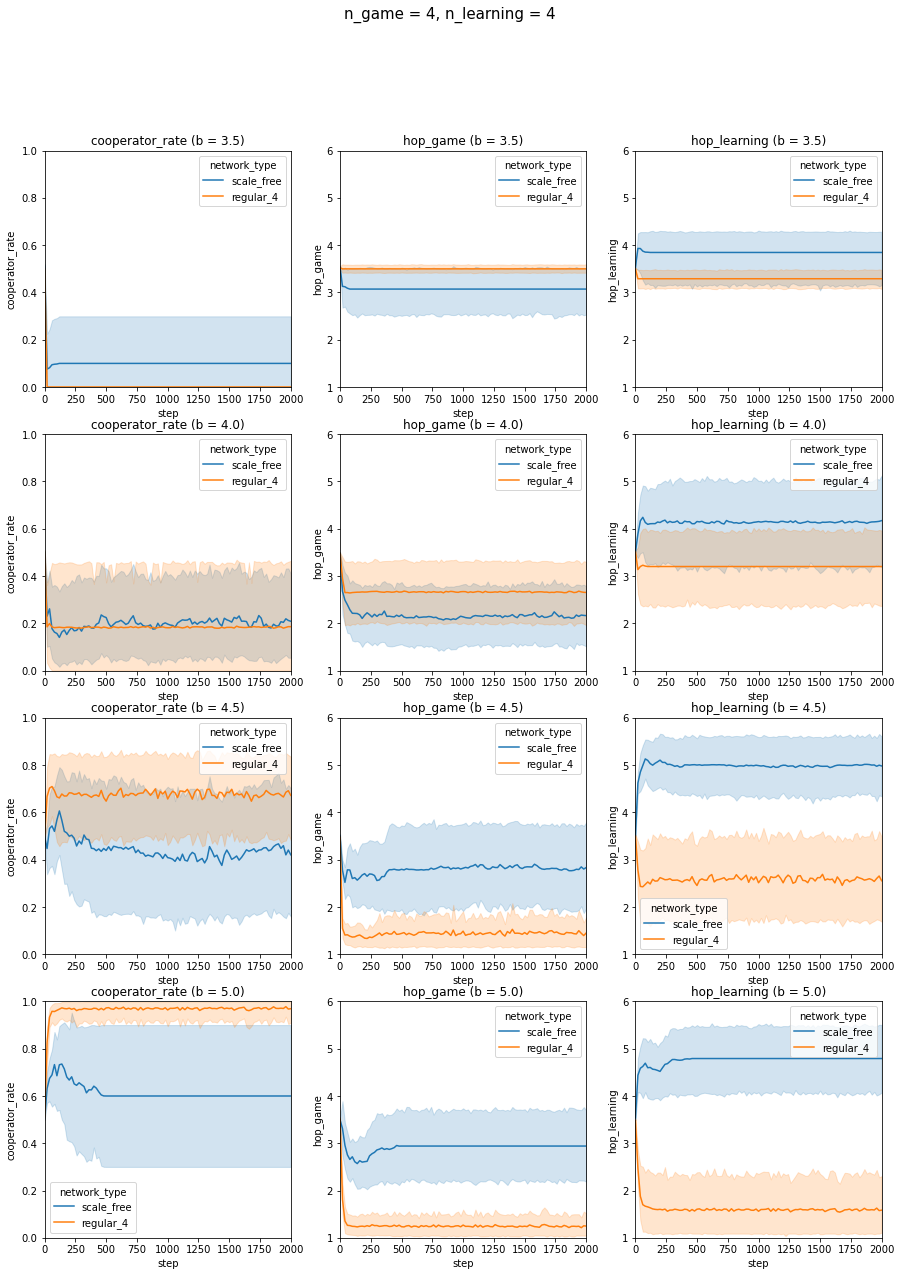

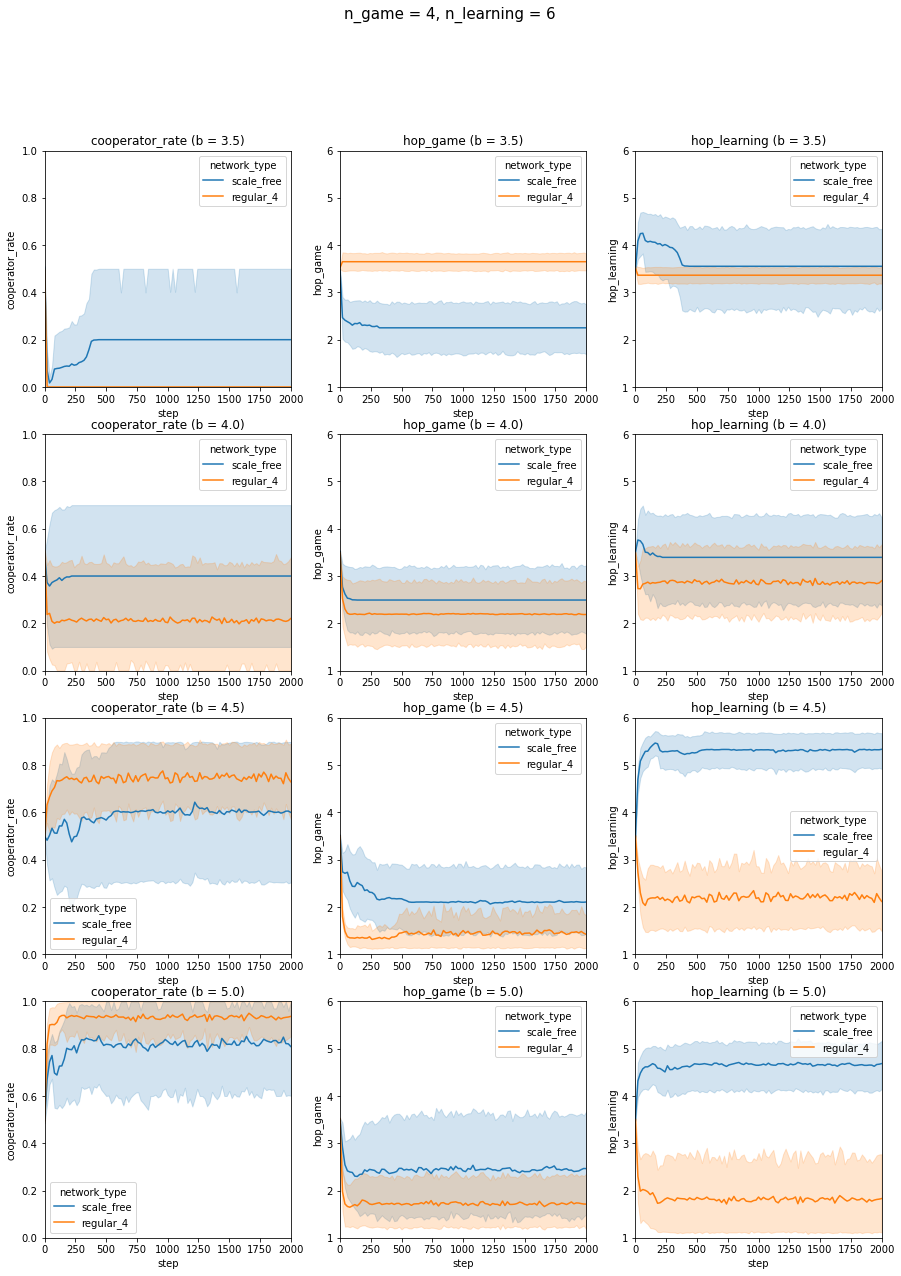

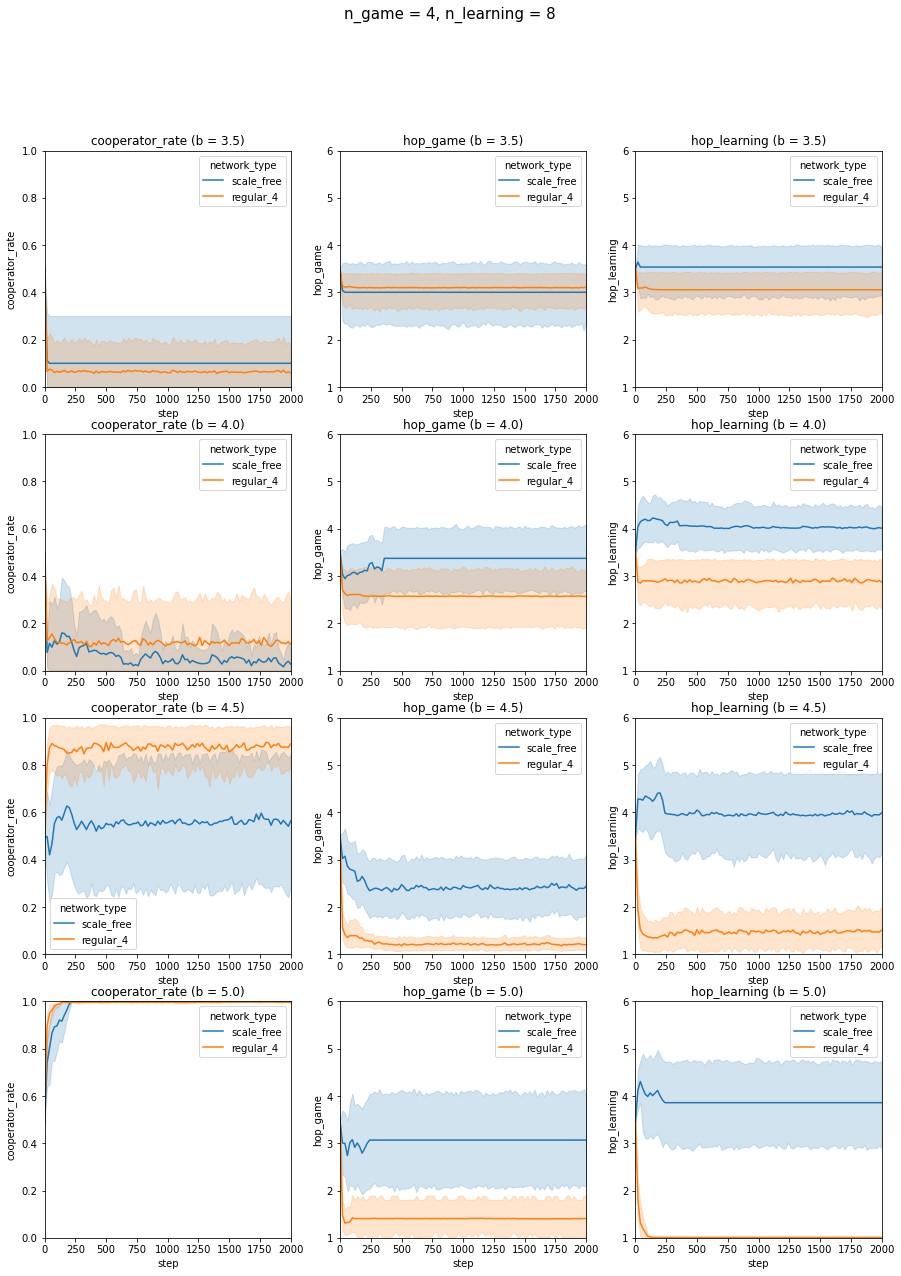

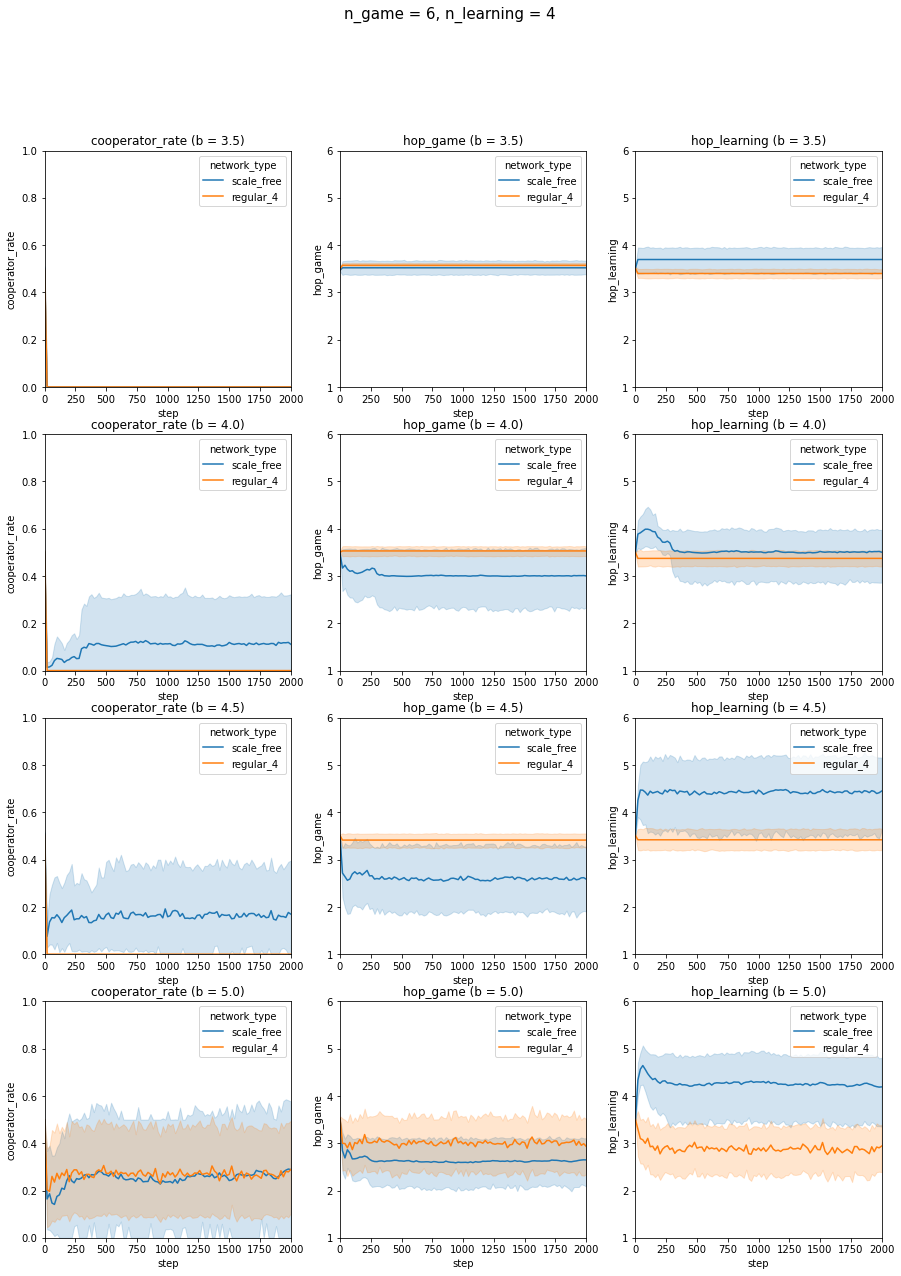

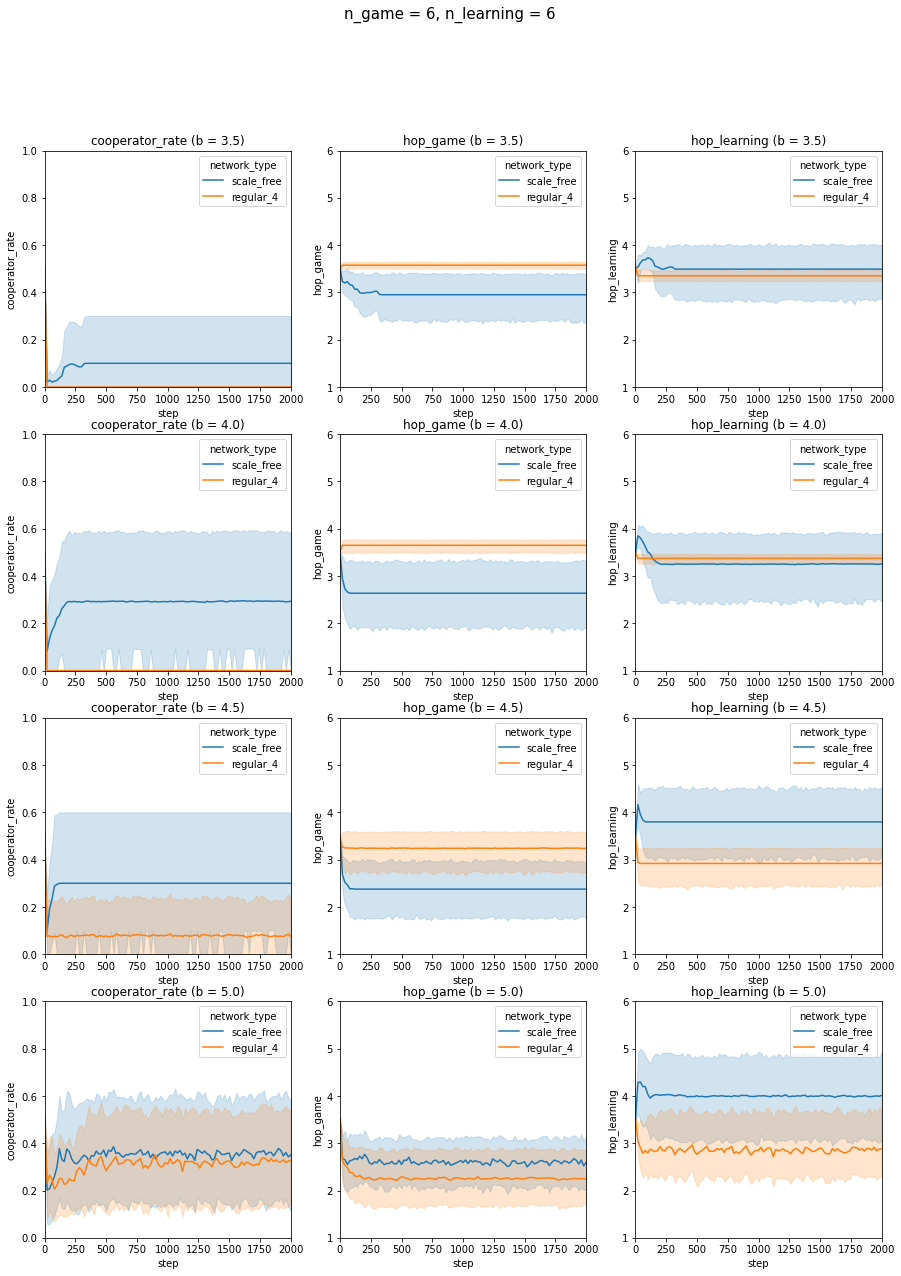

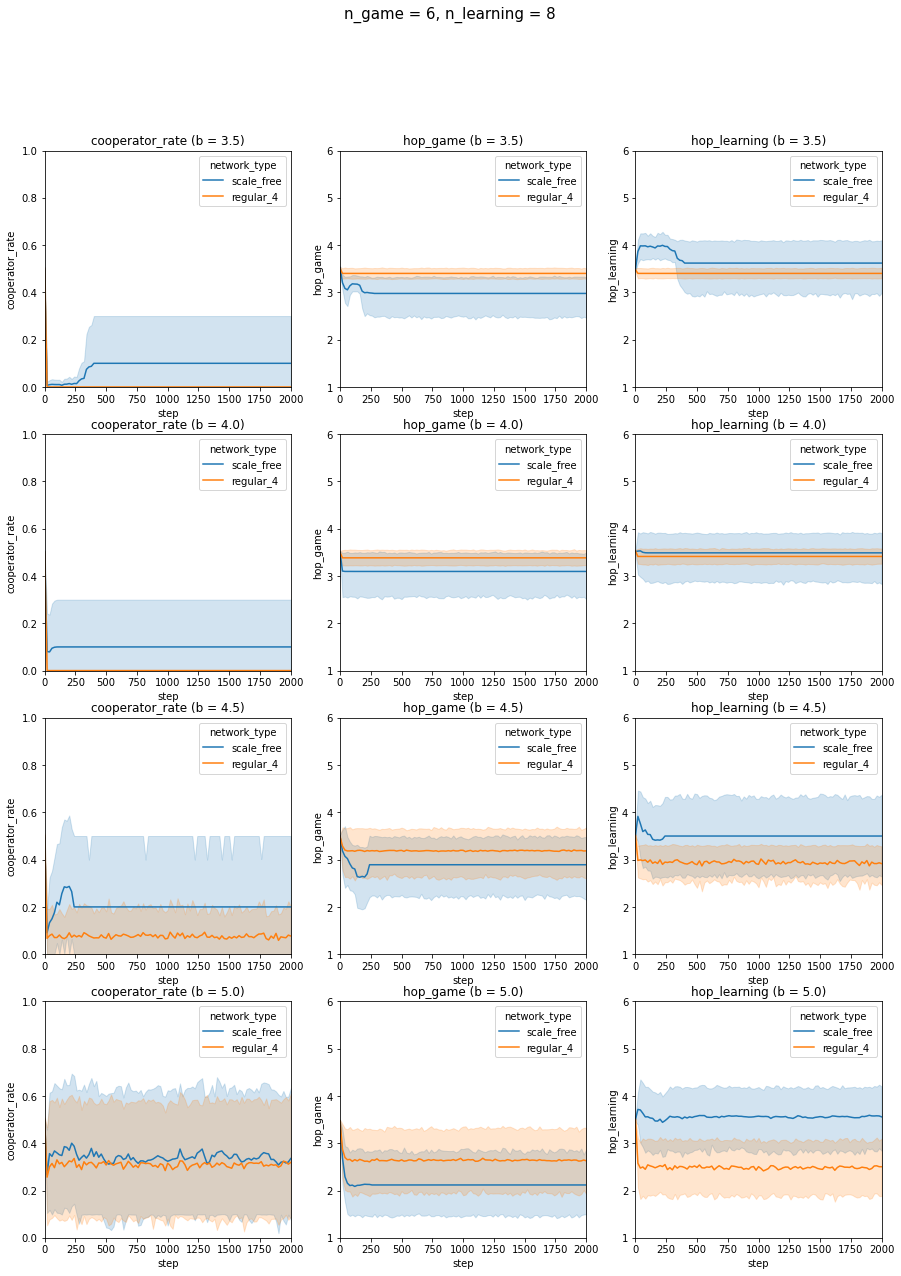

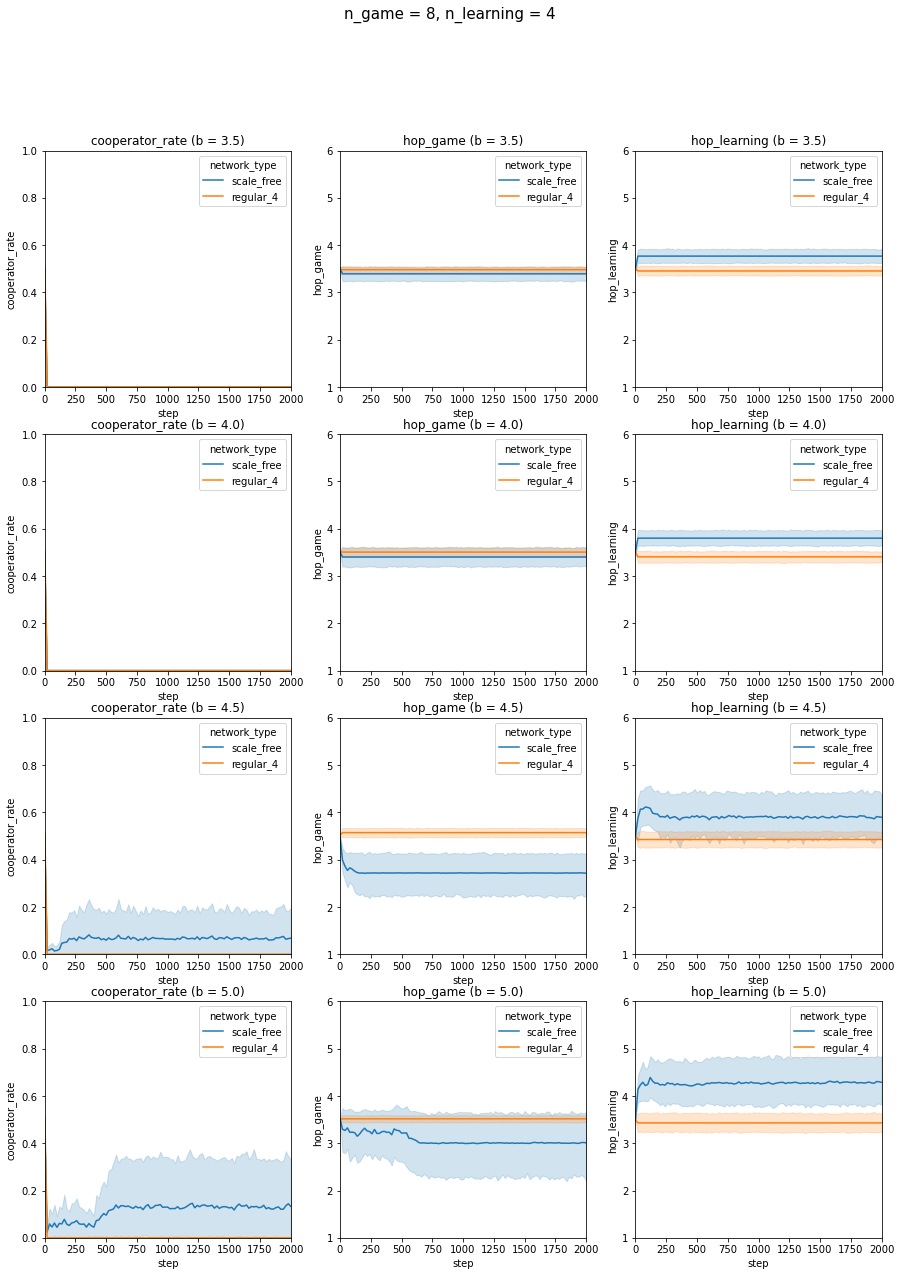

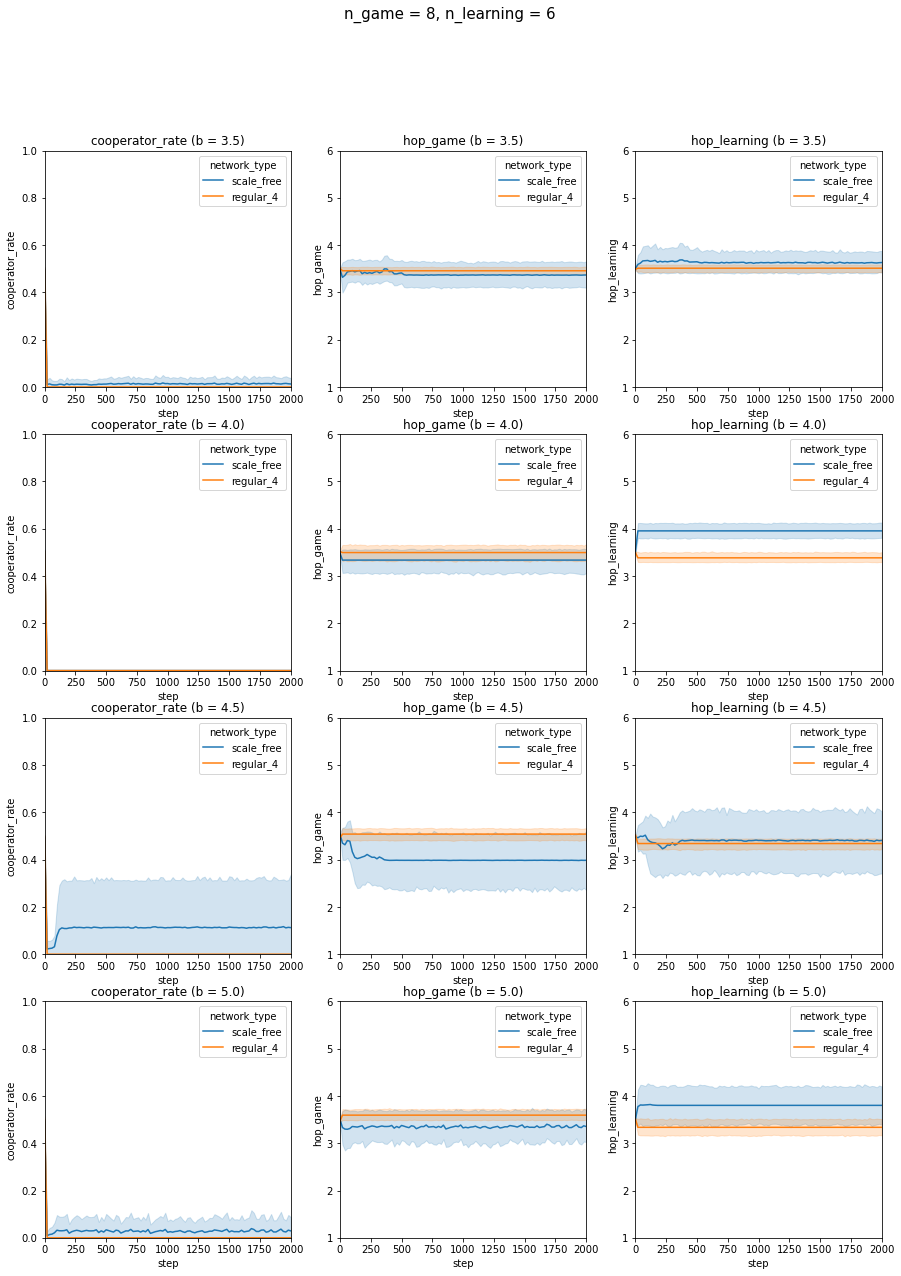

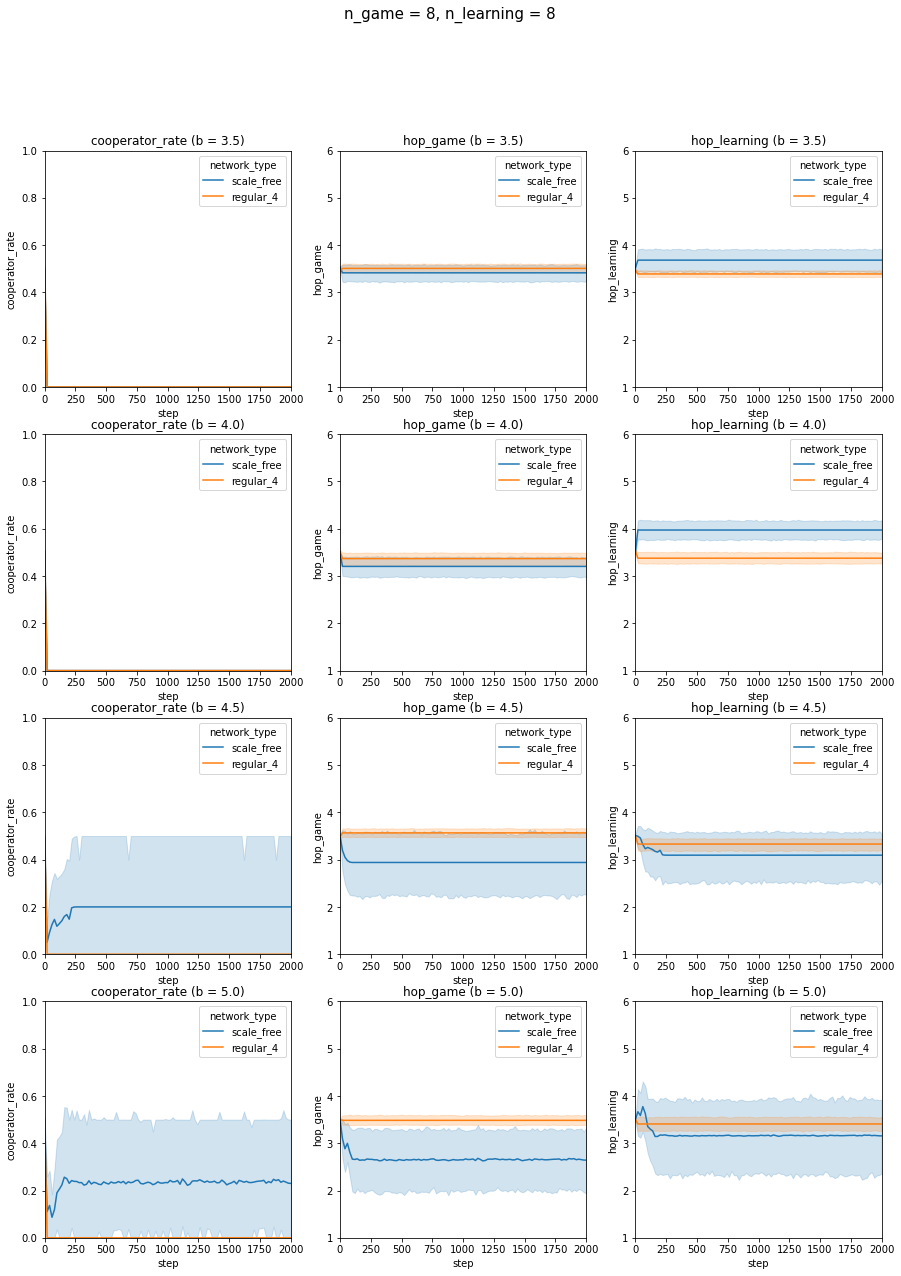

In [3]:
sim = Simulation('data/rich_20211127_134604.csv')
sim.draw_lineplot_rgl_and_sf()

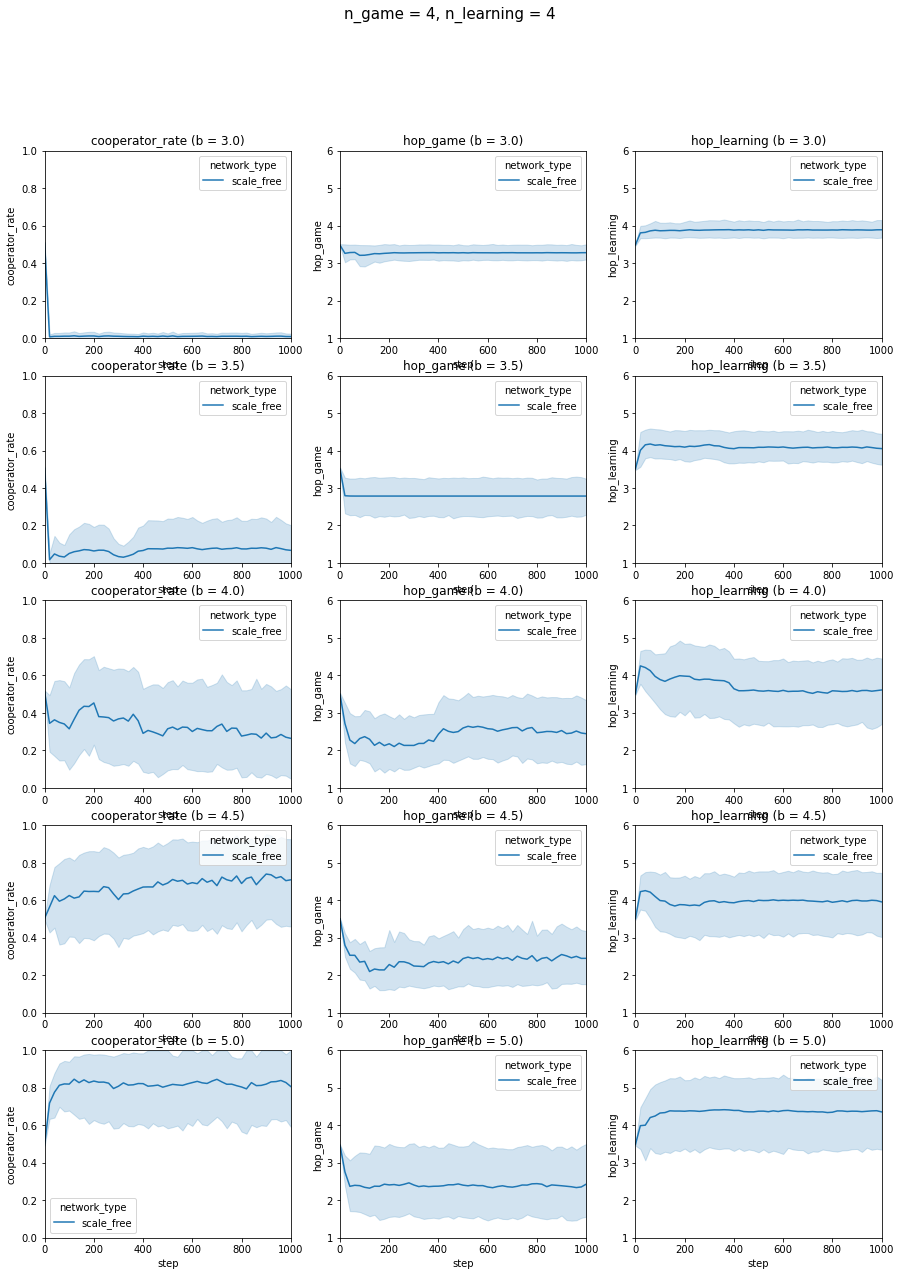

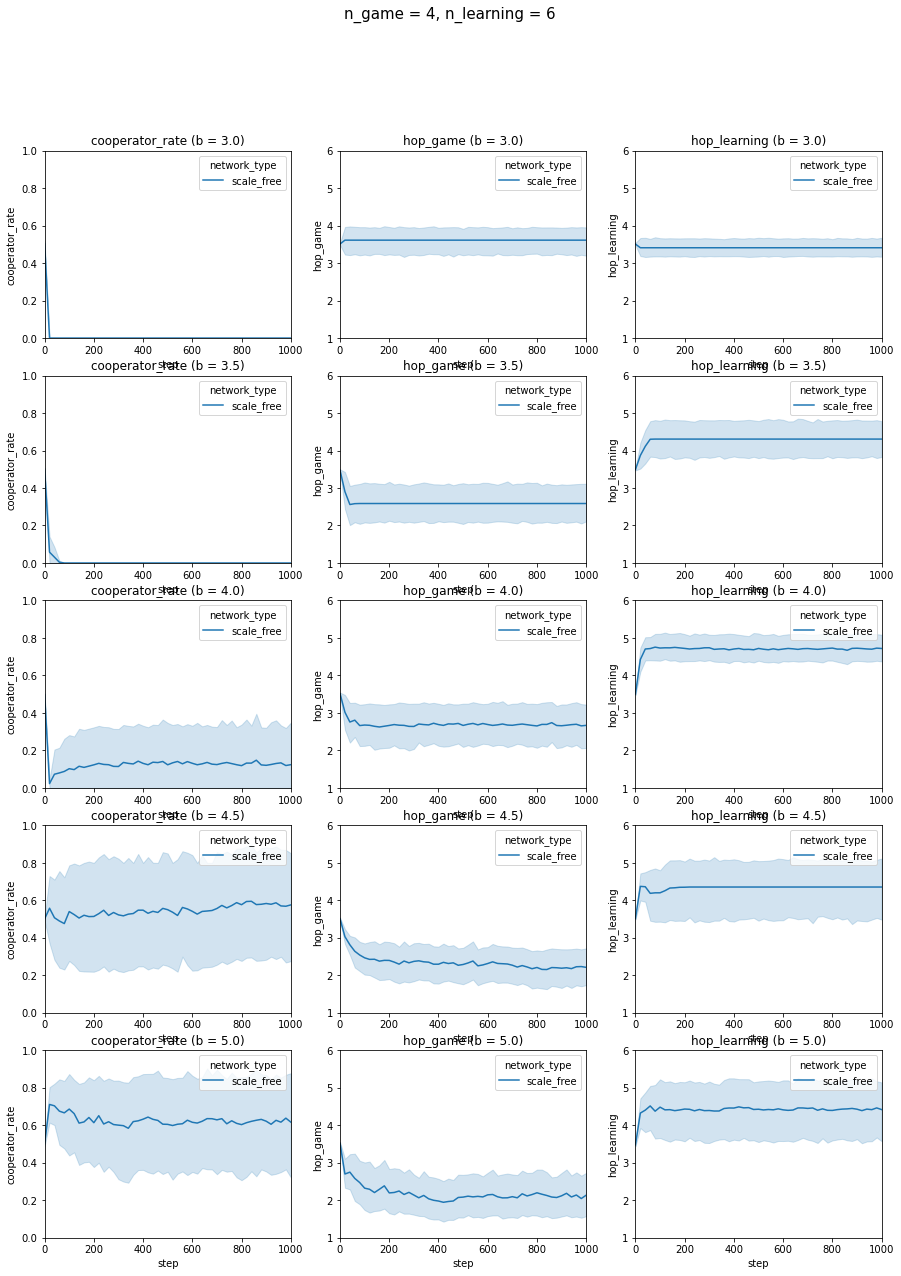

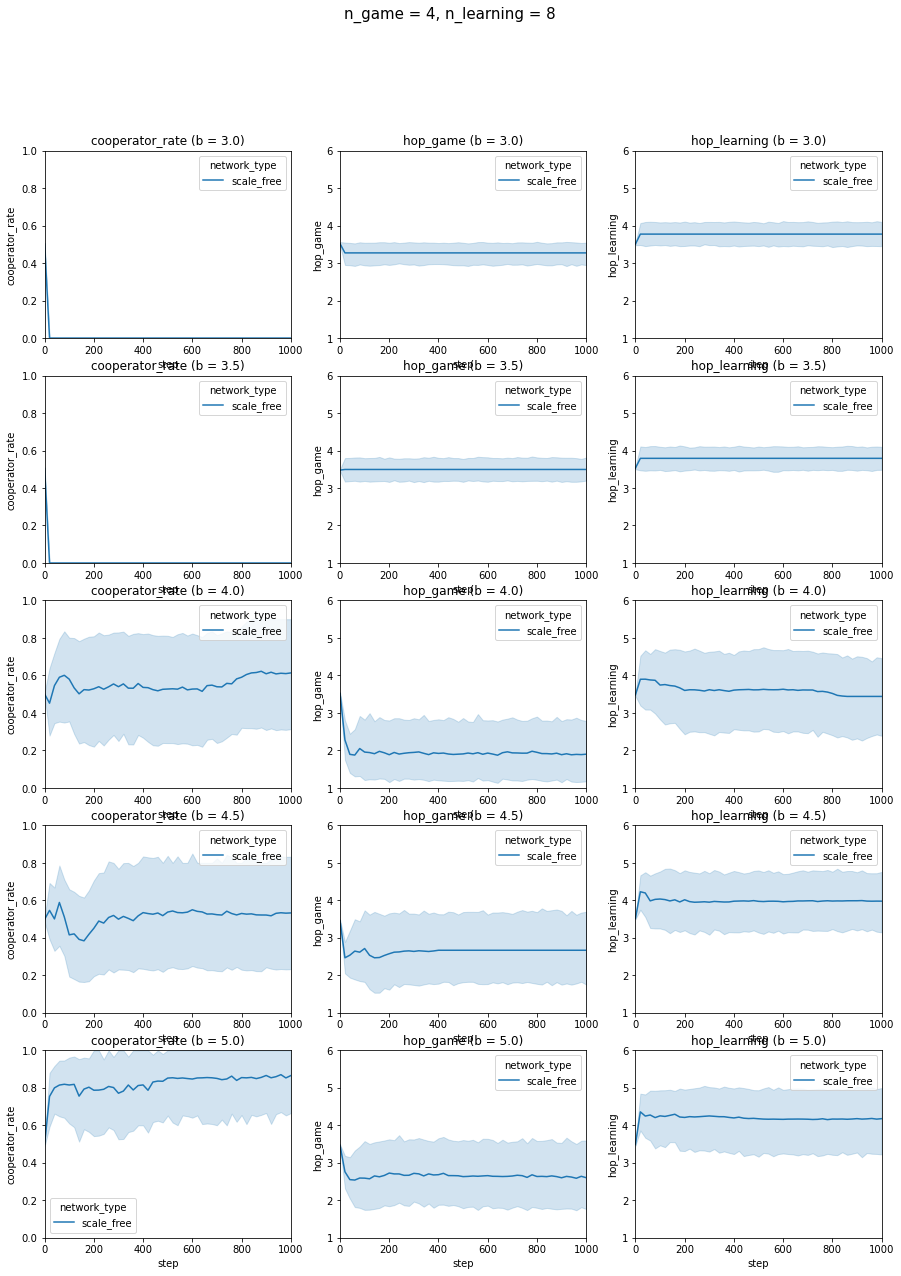

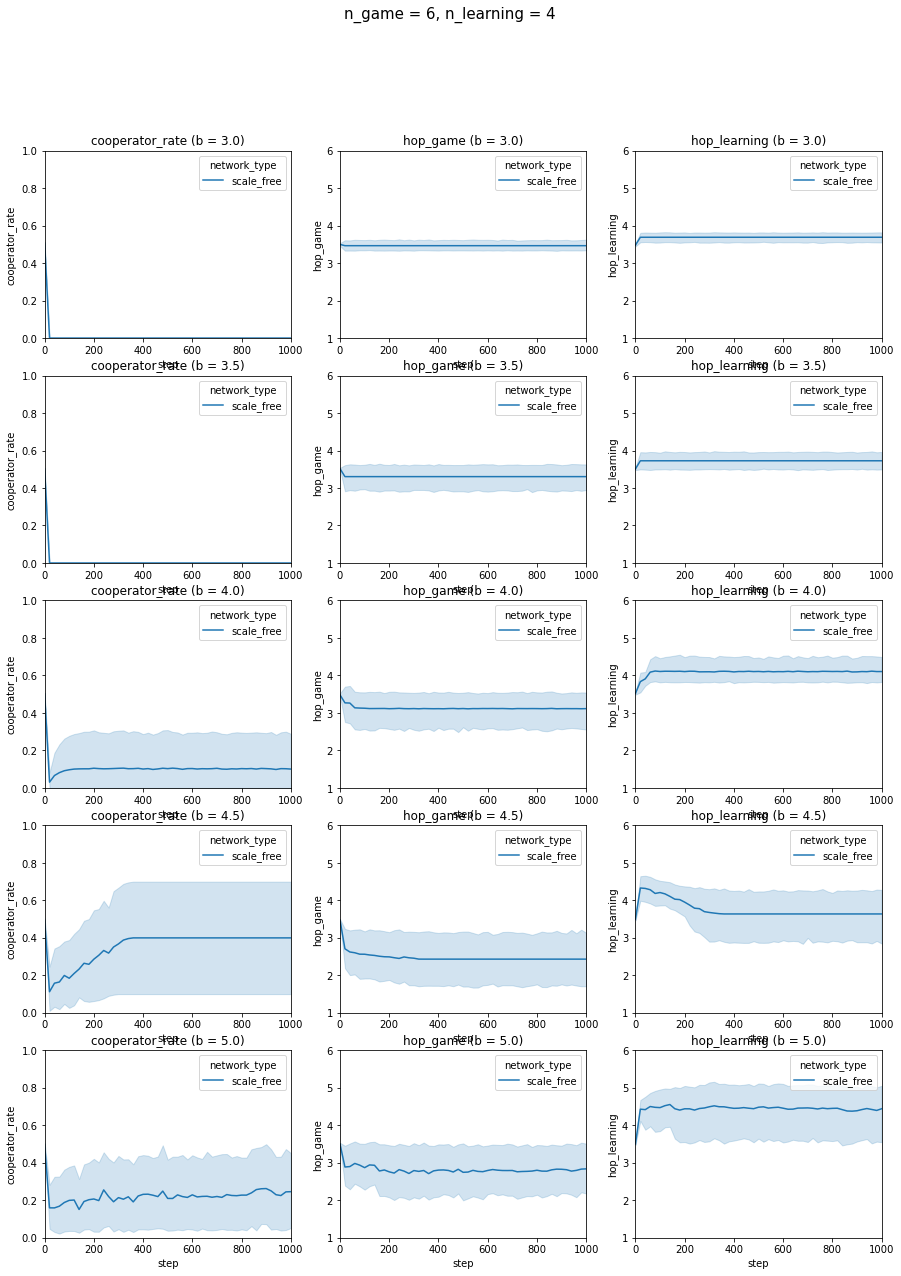

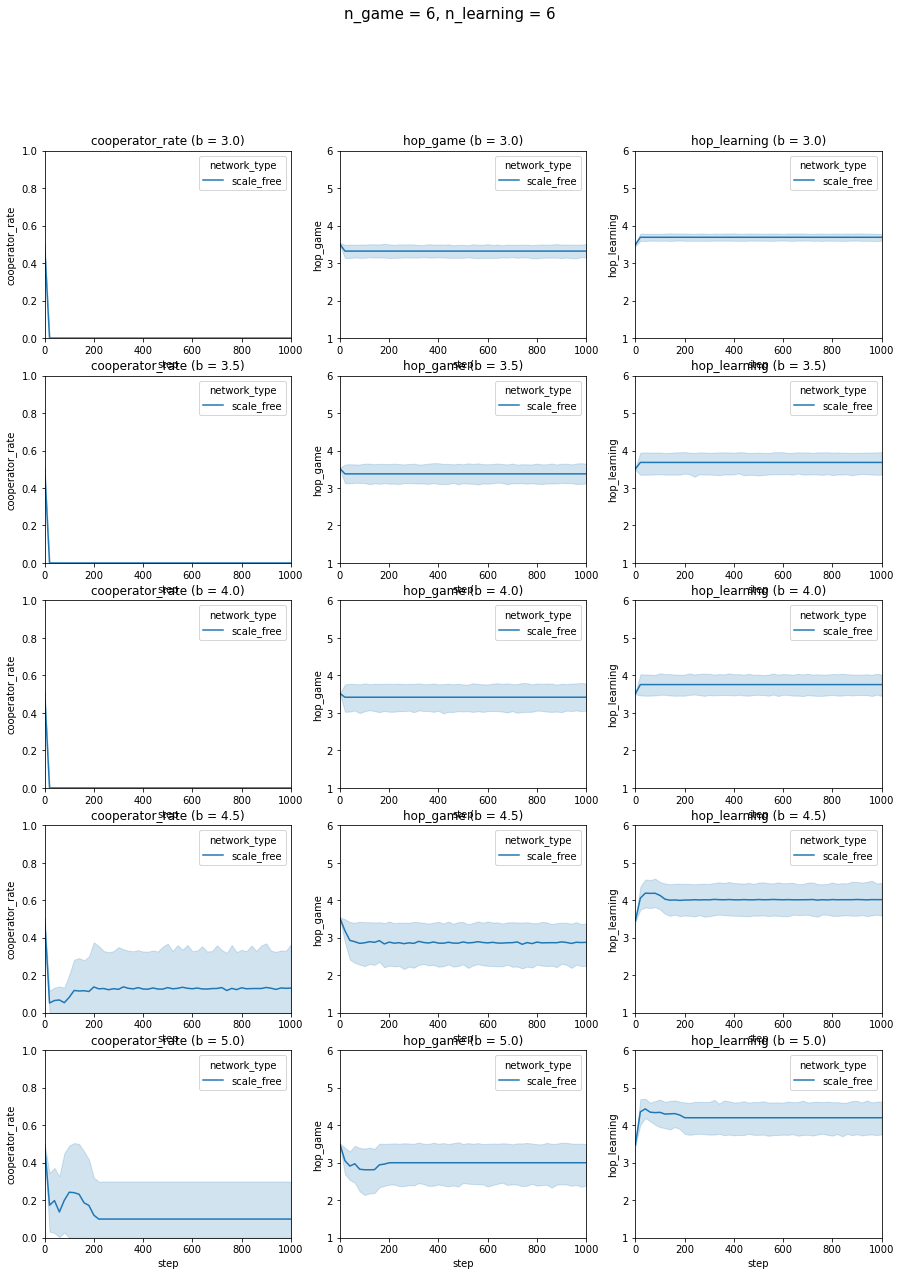

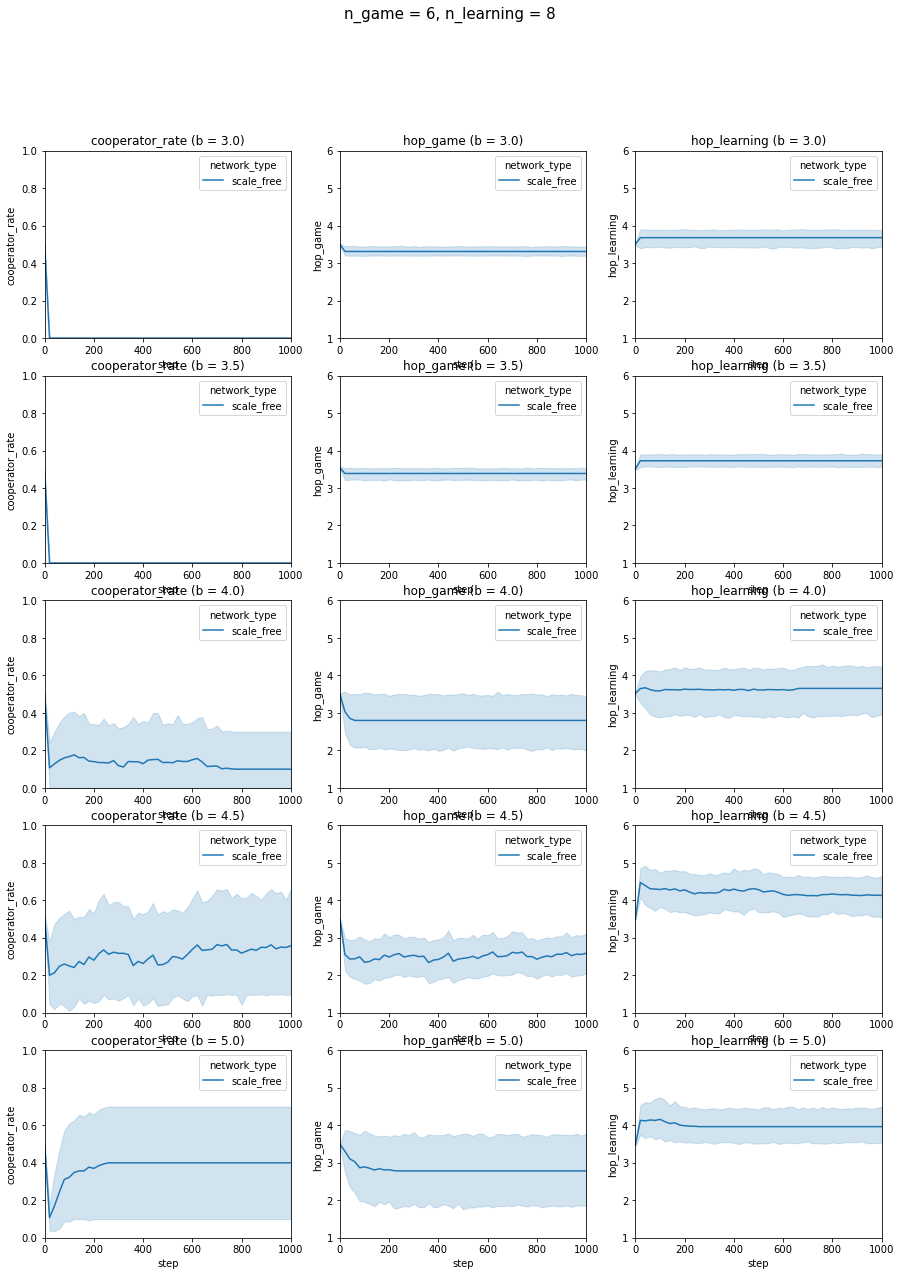

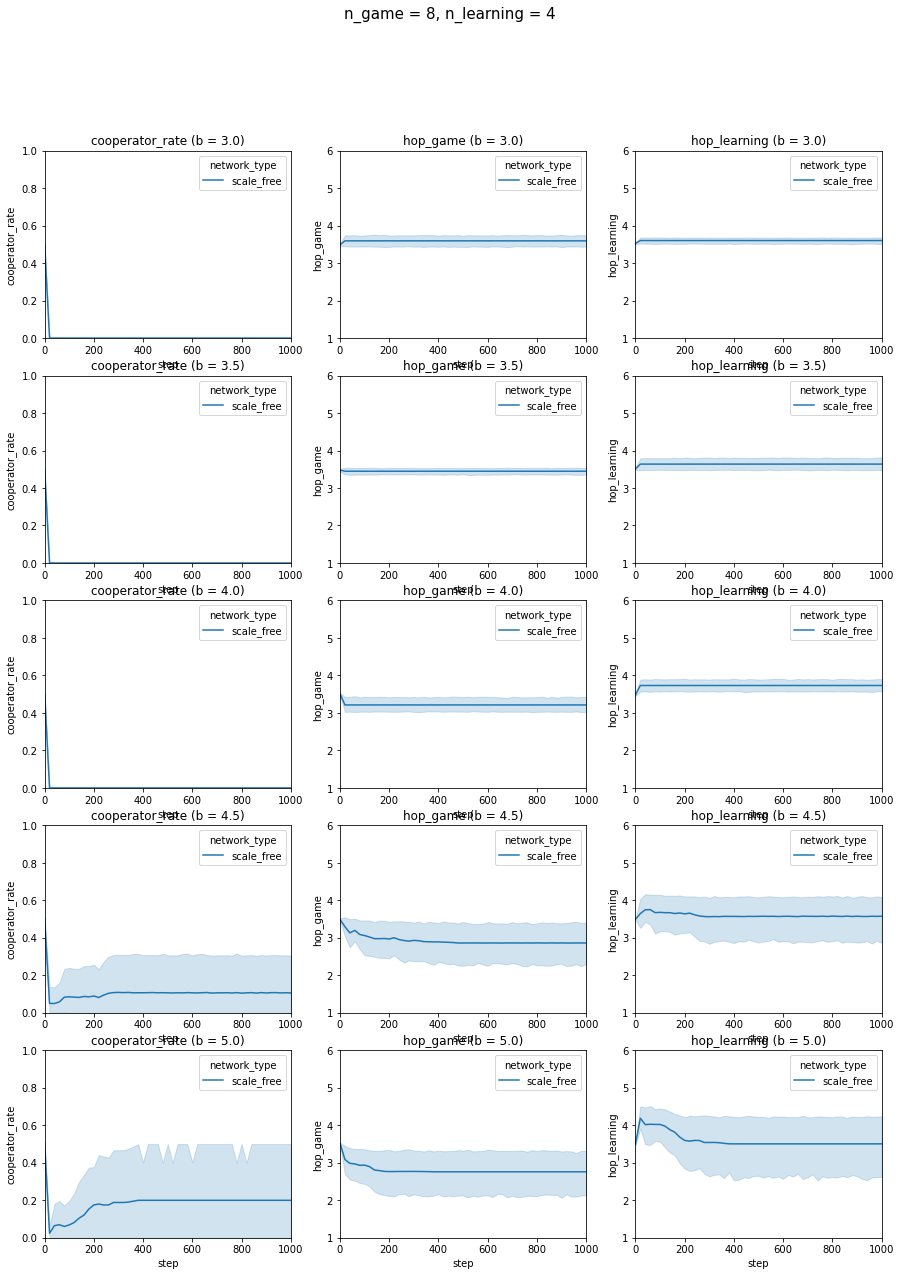

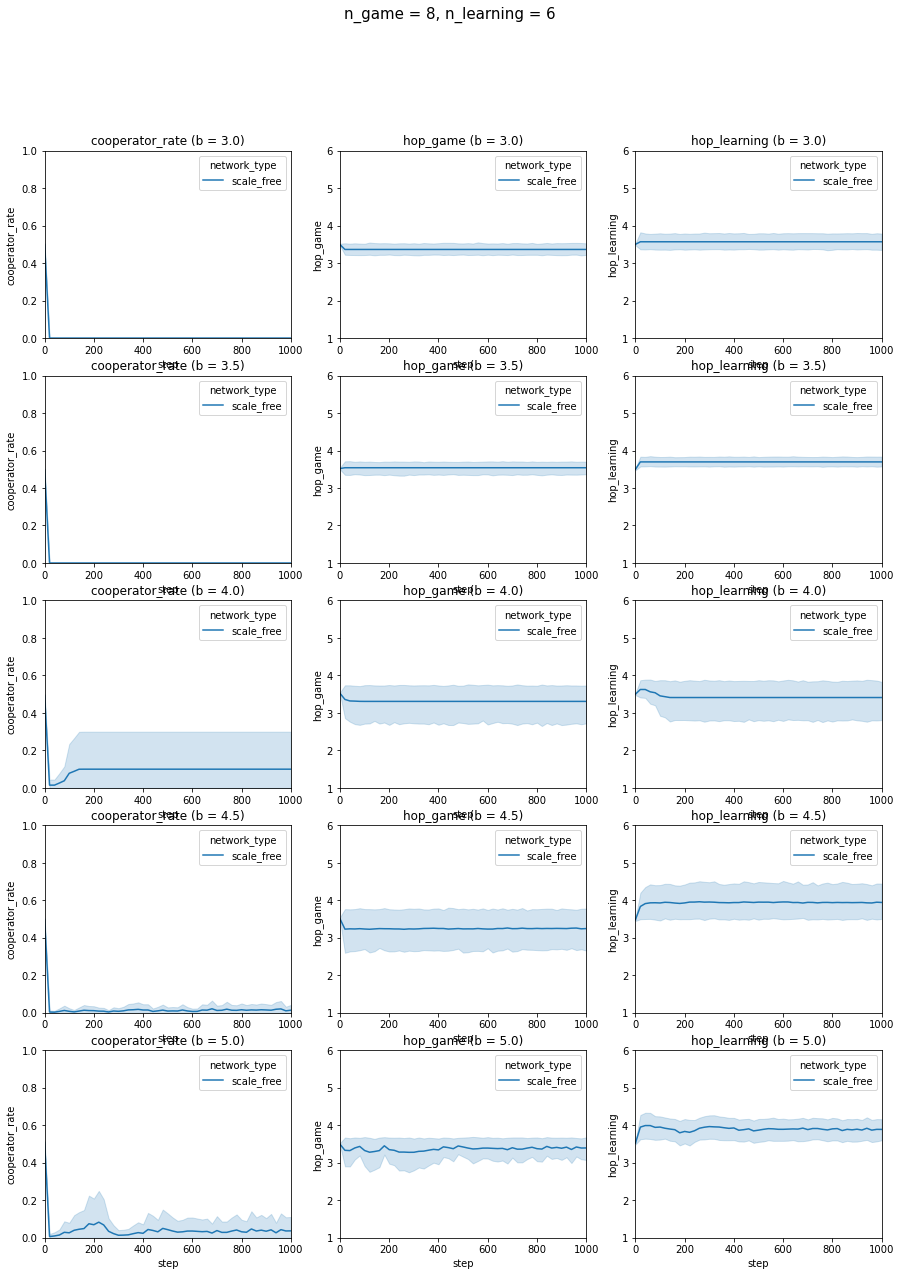

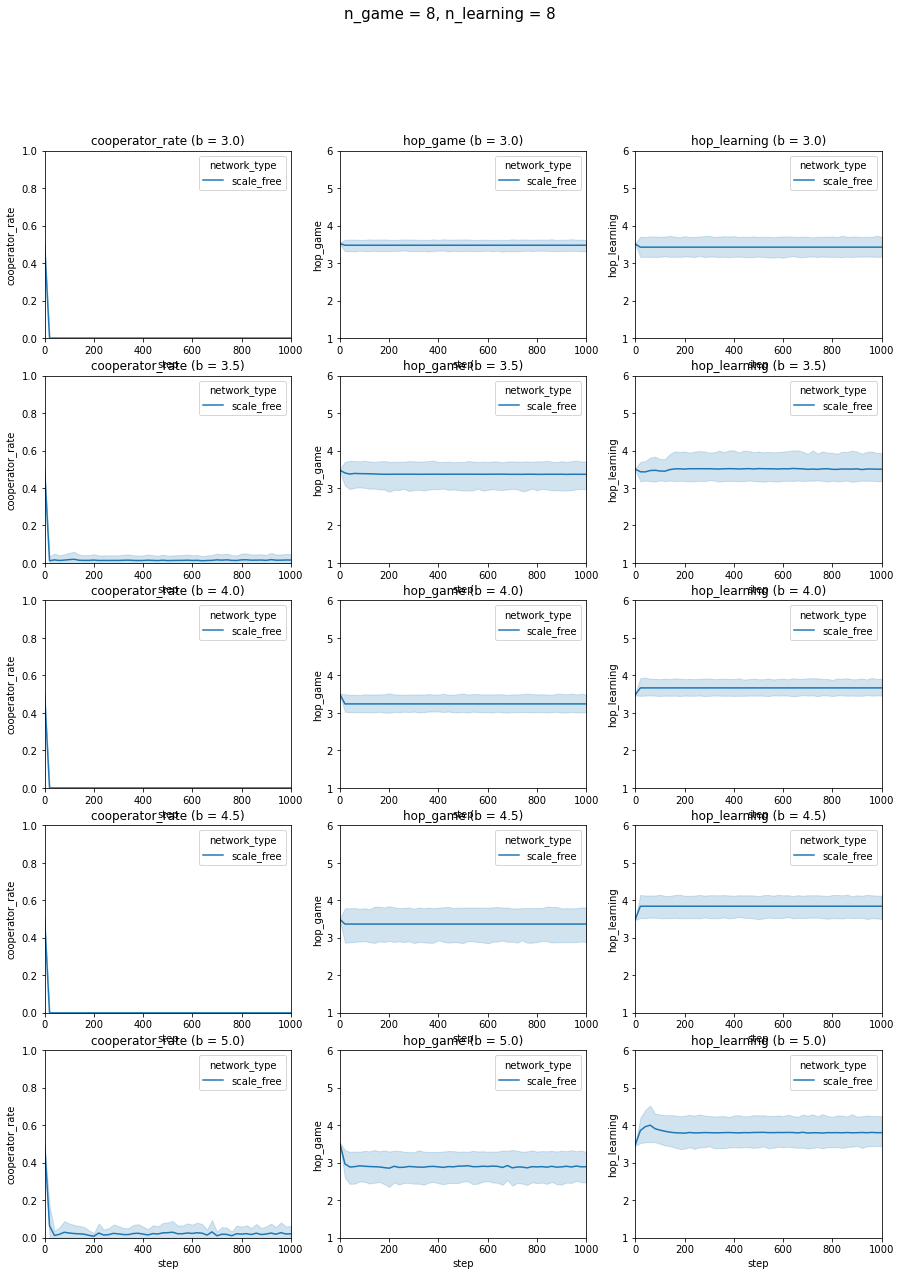

In [4]:
sim = Simulation('data/rich_20211127_151246.csv')
sim.draw_lineplot_rgl_and_sf()